In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

> **Reading Data**

In [2]:
covid_data=pd.read_csv("/kaggle/input/covid-19-dataset/owid-covid-data.csv")
covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344774,ZWE,Africa,Zimbabwe,2023-09-23,265748.0,0.0,0.0,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344775,ZWE,Africa,Zimbabwe,2023-09-24,265748.0,0.0,0.0,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344776,ZWE,Africa,Zimbabwe,2023-09-25,265748.0,0.0,0.0,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344777,ZWE,Africa,Zimbabwe,2023-09-26,265748.0,0.0,0.0,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


> **Data Describing**

In [3]:
covid_data.head(7)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
covid_data.tail(7)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
344772,ZWE,Africa,Zimbabwe,2023-09-21,265748.0,0.0,0.857,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344773,ZWE,Africa,Zimbabwe,2023-09-22,265748.0,0.0,0.857,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344774,ZWE,Africa,Zimbabwe,2023-09-23,265748.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344775,ZWE,Africa,Zimbabwe,2023-09-24,265748.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344776,ZWE,Africa,Zimbabwe,2023-09-25,265748.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344777,ZWE,Africa,Zimbabwe,2023-09-26,265748.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344778,ZWE,Africa,Zimbabwe,2023-09-27,265748.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [5]:
covid_data.sample(4)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
340075,OWID_WRL,NaN,World,2022-01-25,356030501.0,2060165.0,3421152.714,5660078.0,6650.0,8676.857,...,34.635,60.130,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
39410,BIH,Europe,Bosnia and Herzegovina,2023-05-02,402887.0,0.0,9.429,16337.0,0.0,0.143,...,47.700,97.164,3.500,77.40,0.780,3.233530e+06,NaN,NaN,NaN,NaN
290675,ESP,Europe,Spain,2020-10-07,849249.0,0.0,9304.714,34874.0,0.0,135.286,...,31.400,NaN,2.970,83.56,0.904,4.755863e+07,NaN,NaN,NaN,NaN
343792,ZWE,Africa,Zimbabwe,2021-01-14,24256.0,1017.0,921.714,589.0,38.0,22.571,...,30.700,36.791,1.700,61.49,0.571,1.632054e+07,NaN,NaN,NaN,NaN


In [6]:
covid_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,306964.0,6.571274e+06,4.013913e+07,1.0000,7910.000000,6.889000e+04,7.269022e+05,7.708747e+08
new_cases,335338.0,9.740990e+03,1.111088e+05,0.0000,0.000000,2.000000e+00,2.760000e+02,8.401961e+06
new_cases_smoothed,334079.0,9.777569e+03,9.519139e+04,0.0000,0.286000,2.600000e+01,5.151430e+02,6.402036e+06
total_deaths,285503.0,8.538039e+04,4.371278e+05,1.0000,125.000000,1.302000e+03,1.174400e+04,6.959303e+06
new_deaths,335378.0,8.677799e+01,6.182774e+02,0.0000,0.000000,0.000000e+00,3.000000e+00,2.793900e+04
...,...,...,...,...,...,...,...,...
population,344779.0,1.281917e+08,6.598803e+08,47.0000,449002.000000,5.882259e+06,2.830170e+07,7.975105e+09
excess_mortality_cumulative_absolute,11944.0,5.113397e+04,1.443228e+05,-37726.0980,106.400017,5.732800e+03,3.666995e+04,1.289776e+06
excess_mortality_cumulative,11944.0,9.738000e+00,1.238457e+01,-44.2300,1.310000,8.060000e+00,1.547000e+01,7.655000e+01
excess_mortality,11944.0,1.146195e+01,2.536237e+01,-95.9200,-1.632500,5.770000e+00,1.652250e+01,3.776300e+02


In [7]:
covid_data.describe(include="object")

,iso_code,continent,location,date,tests_units
count,344779,328403,344779,344779,106788
unique,255,6,255,1367,4
top,MEX,Africa,Mexico,2022-04-20,tests performed
freq,1366,77749,1366,255,80099


In [8]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344779 entries, 0 to 344778
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    344779 non-null  object 
 1   continent                                   328403 non-null  object 
 2   location                                    344779 non-null  object 
 3   date                                        344779 non-null  object 
 4   total_cases                                 306964 non-null  float64
 5   new_cases                                   335338 non-null  float64
 6   new_cases_smoothed                          334079 non-null  float64
 7   total_deaths                                285503 non-null  float64
 8   new_deaths                                  335378 non-null  float64
 9   new_deaths_smoothed                         334148 non-null  float64
 

In [9]:
covid_data.isnull().sum()

iso_code                                        0
continent                                   16376
location                                        0
date                                            0
total_cases                                 37815
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       332835
excess_mortality_cumulative                332835
excess_mortality                           332835
excess_mortality_cumulative_per_million    332835
Length: 67, dtype: int64

In [10]:
covid_data.columns.to_list()

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [11]:
covid_data['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

> ****Data Analysis Poland****

In [12]:
pl_data=covid_data[covid_data.location=="Poland"].reset_index()
pl_data

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,244086,POL,Europe,Poland,2020-01-03,NaN,0.0,NaN,NaN,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1,244087,POL,Europe,Poland,2020-01-04,NaN,0.0,NaN,NaN,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
2,244088,POL,Europe,Poland,2020-01-05,NaN,0.0,NaN,NaN,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,-337.9,-3.84,-3.84,-8.792983
3,244089,POL,Europe,Poland,2020-01-06,NaN,0.0,NaN,NaN,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
4,244090,POL,Europe,Poland,2020-01-07,NaN,0.0,NaN,NaN,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,245445,POL,Europe,Poland,2023-09-23,6520928.0,0.0,140.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1360,245446,POL,Europe,Poland,2023-09-24,6520928.0,0.0,140.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1361,245447,POL,Europe,Poland,2023-09-25,6520928.0,0.0,140.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1362,245448,POL,Europe,Poland,2023-09-26,6520928.0,0.0,0.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN


> **Data Describing of poland**

In [13]:
pl_data.head(7)

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,244086,POL,Europe,Poland,2020-01-03,NaN,0.0,NaN,NaN,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1,244087,POL,Europe,Poland,2020-01-04,NaN,0.0,NaN,NaN,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
2,244088,POL,Europe,Poland,2020-01-05,NaN,0.0,NaN,NaN,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,-337.9,-3.84,-3.84,-8.792983
3,244089,POL,Europe,Poland,2020-01-06,NaN,0.0,NaN,NaN,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
4,244090,POL,Europe,Poland,2020-01-07,NaN,0.0,NaN,NaN,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
5,244091,POL,Europe,Poland,2020-01-08,NaN,0.0,0.0,NaN,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
6,244092,POL,Europe,Poland,2020-01-09,NaN,0.0,0.0,NaN,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN


In [14]:
pl_data.tail(7)

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1357,245443,POL,Europe,Poland,2023-09-21,6520928.0,0.0,140.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1358,245444,POL,Europe,Poland,2023-09-22,6520928.0,0.0,140.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1359,245445,POL,Europe,Poland,2023-09-23,6520928.0,0.0,140.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1360,245446,POL,Europe,Poland,2023-09-24,6520928.0,0.0,140.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1361,245447,POL,Europe,Poland,2023-09-25,6520928.0,0.0,140.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1362,245448,POL,Europe,Poland,2023-09-26,6520928.0,0.0,0.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1363,245449,POL,Europe,Poland,2023-09-27,6520928.0,0.0,0.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN


In [15]:
pl_data.sample(4)

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
239,244325,POL,Europe,Poland,2020-08-29,65480.0,791.0,742.714,2018.0,9.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
838,244924,POL,Europe,Poland,2022-04-20,5986859.0,1527.0,839.143,115868.0,31.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
678,244764,POL,Europe,Poland,2021-11-11,3164112.0,19074.0,14595.857,78538.0,274.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1044,245130,POL,Europe,Poland,2022-11-12,6346114.0,73.0,365.000,118209.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN


In [16]:
pl_data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1364.0,2.447675e+05,3.938972e+02,2.440860e+05,2.444268e+05,2.447675e+05,2.451082e+05,2.454490e+05
total_cases,1302.0,3.808960e+06,2.511124e+06,1.000000e+00,1.478470e+06,3.893360e+06,6.343634e+06,6.520928e+06
new_cases,1364.0,4.780739e+03,8.551909e+03,0.000000e+00,1.727500e+02,6.115000e+02,5.432000e+03,5.765900e+04
new_cases_smoothed,1359.0,4.798328e+03,8.218301e+03,0.000000e+00,2.460000e+02,6.955710e+02,5.458643e+03,4.907314e+04
total_deaths,1294.0,7.723914e+04,4.571777e+04,1.000000e+00,3.718450e+04,9.150550e+04,1.181750e+05,1.196440e+05
...,...,...,...,...,...,...,...,...
population,1364.0,3.985714e+07,0.000000e+00,3.985714e+07,3.985714e+07,3.985714e+07,3.985714e+07,3.985714e+07
excess_mortality_cumulative_absolute,191.0,1.067137e+05,7.095648e+04,-7.514300e+03,4.468235e+04,1.184599e+05,1.706669e+05,1.811855e+05
excess_mortality_cumulative,191.0,1.070257e+01,8.265894e+00,-7.390000e+00,1.011000e+01,1.442000e+01,1.632500e+01,1.893000e+01
excess_mortality,191.0,1.006597e+01,2.277851e+01,-1.670000e+01,-3.290000e+00,3.120000e+00,1.161500e+01,1.084200e+02


In [17]:
pl_data.describe(include="object")

,iso_code,continent,location,date,tests_units
count,1364,1364,1364,1364,827
unique,1,1,1,1364,1
top,POL,Europe,Poland,2020-01-03,tests performed
freq,1364,1364,1364,1,827


In [18]:
pl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       1364 non-null   int64  
 1   iso_code                                    1364 non-null   object 
 2   continent                                   1364 non-null   object 
 3   location                                    1364 non-null   object 
 4   date                                        1364 non-null   object 
 5   total_cases                                 1302 non-null   float64
 6   new_cases                                   1364 non-null   float64
 7   new_cases_smoothed                          1359 non-null   float64
 8   total_deaths                                1294 non-null   float64
 9   new_deaths                                  1364 non-null   float64
 10  new_deaths_s

In [19]:
pl_data.shape

(1364, 68)

In [20]:
pl_data.isnull().sum()

index                                         0
iso_code                                      0
continent                                     0
location                                      0
date                                          0
                                           ... 
population                                    0
excess_mortality_cumulative_absolute       1173
excess_mortality_cumulative                1173
excess_mortality                           1173
excess_mortality_cumulative_per_million    1173
Length: 68, dtype: int64

> **Recent Date**

In [21]:
pl_data["date"].max()

'2023-09-27'

In [22]:
recent_pl_data=pl_data[pl_data.date==pl_data["date"].max()]
recent_pl_data

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1363,245449,POL,Europe,Poland,2023-09-27,6520928.0,0.0,0.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN


In [23]:
pl_data['date'].sort_values(ascending = False).head()

1363    2023-09-27
1362    2023-09-26
1361    2023-09-25
1360    2023-09-24
1359    2023-09-23
Name: date, dtype: object

In [24]:
pl_data.sort_values(['date'],ascending = False).head()

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1363,245449,POL,Europe,Poland,2023-09-27,6520928.0,0.0,0.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1362,245448,POL,Europe,Poland,2023-09-26,6520928.0,0.0,0.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1361,245447,POL,Europe,Poland,2023-09-25,6520928.0,0.0,140.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1360,245446,POL,Europe,Poland,2023-09-24,6520928.0,0.0,140.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN
1359,245445,POL,Europe,Poland,2023-09-23,6520928.0,0.0,140.0,119644.0,0.0,...,33.1,NaN,6.62,78.73,0.88,39857144.0,NaN,NaN,NaN,NaN


> **Table of numeric values**

In [25]:
New_pl_data=pl_data.groupby("date")[['total_cases','new_cases','new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed','total_tests','new_tests','total_vaccinations','population_density','median_age','aged_65_older','aged_70_older']].sum().reset_index()
New_pl_data

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_tests,new_tests,total_vaccinations,population_density,median_age,aged_65_older,aged_70_older
0,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,124.027,41.8,16.763,10.202
1,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,124.027,41.8,16.763,10.202
2,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,124.027,41.8,16.763,10.202
3,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,124.027,41.8,16.763,10.202
4,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,124.027,41.8,16.763,10.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,2023-09-23,6520928.0,0.0,140.0,119644.0,0.0,0.286,0.0,0.0,58027025.0,124.027,41.8,16.763,10.202
1360,2023-09-24,6520928.0,0.0,140.0,119644.0,0.0,0.286,0.0,0.0,58027029.0,124.027,41.8,16.763,10.202
1361,2023-09-25,6520928.0,0.0,140.0,119644.0,0.0,0.286,0.0,0.0,58027121.0,124.027,41.8,16.763,10.202
1362,2023-09-26,6520928.0,0.0,0.0,119644.0,0.0,0.000,0.0,0.0,58027195.0,124.027,41.8,16.763,10.202


In [26]:
New_pl_data.head(4)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_tests,new_tests,total_vaccinations,population_density,median_age,aged_65_older,aged_70_older
0,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.027,41.8,16.763,10.202
1,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.027,41.8,16.763,10.202
2,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.027,41.8,16.763,10.202
3,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.027,41.8,16.763,10.202


In [27]:
New_pl_data.tail(7)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_tests,new_tests,total_vaccinations,population_density,median_age,aged_65_older,aged_70_older
1357,2023-09-21,6520928.0,0.0,140.0,119644.0,0.0,0.286,0.0,0.0,58026893.0,124.027,41.8,16.763,10.202
1358,2023-09-22,6520928.0,0.0,140.0,119644.0,0.0,0.286,0.0,0.0,58026980.0,124.027,41.8,16.763,10.202
1359,2023-09-23,6520928.0,0.0,140.0,119644.0,0.0,0.286,0.0,0.0,58027025.0,124.027,41.8,16.763,10.202
1360,2023-09-24,6520928.0,0.0,140.0,119644.0,0.0,0.286,0.0,0.0,58027029.0,124.027,41.8,16.763,10.202
1361,2023-09-25,6520928.0,0.0,140.0,119644.0,0.0,0.286,0.0,0.0,58027121.0,124.027,41.8,16.763,10.202
1362,2023-09-26,6520928.0,0.0,0.0,119644.0,0.0,0.000,0.0,0.0,58027195.0,124.027,41.8,16.763,10.202
1363,2023-09-27,6520928.0,0.0,0.0,119644.0,0.0,0.000,0.0,0.0,58027265.0,124.027,41.8,16.763,10.202


In [28]:
New_pl_data.sample(5)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_tests,new_tests,total_vaccinations,population_density,median_age,aged_65_older,aged_70_older
1217,2023-05-04,6514285.0,59.0,141.286,119557.0,0.0,1.571,0.0,0.0,57993296.0,124.027,41.8,16.763,10.202
1199,2023-04-16,6508765.0,104.0,667.286,119482.0,2.0,8.429,0.0,0.0,57966000.0,124.027,41.8,16.763,10.202
865,2022-05-17,6003576.0,512.0,387.857,116217.0,10.0,9.714,0.0,0.0,54405303.0,124.027,41.8,16.763,10.202
1070,2022-12-08,6356625.0,648.0,489.000,118365.0,15.0,5.429,0.0,0.0,57696135.0,124.027,41.8,16.763,10.202
1277,2023-07-03,6517912.0,2.0,14.714,119627.0,0.0,0.429,0.0,0.0,58018552.0,124.027,41.8,16.763,10.202


In [29]:
New_pl_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,1364.0,3.635825e+06,2.578538e+06,0.000,1.087439e+06,3.210567e+06,6.333744e+06,6.520928e+06
new_cases,1364.0,4.780739e+03,8.551909e+03,0.000,1.727500e+02,6.115000e+02,5.432000e+03,5.765900e+04
new_cases_smoothed,1364.0,4.780739e+03,8.208341e+03,0.000,2.347858e+02,6.893570e+02,5.442500e+03,4.907314e+04
total_deaths,1364.0,7.327525e+04,4.768060e+04,0.000,2.105000e+04,7.888700e+04,1.180175e+05,1.196440e+05
new_deaths,1364.0,8.771554e+01,1.646032e+02,0.000,1.000000e+00,1.200000e+01,5.525000e+01,9.540000e+02
new_deaths_smoothed,1364.0,8.771556e+01,1.390948e+02,0.000,4.535500e+00,1.271400e+01,1.224645e+02,6.034290e+02
total_tests,1364.0,1.367983e+06,5.738432e+06,0.000,0.000000e+00,0.000000e+00,0.000000e+00,3.696238e+07
new_tests,1364.0,0.000000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
total_vaccinations,1364.0,2.994135e+07,2.598339e+07,0.000,0.000000e+00,3.685994e+07,5.702894e+07,5.802726e+07
population_density,1364.0,1.240270e+02,2.843213e-14,124.027,1.240270e+02,1.240270e+02,1.240270e+02,1.240270e+02


In [30]:
New_pl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 1364 non-null   object 
 1   total_cases          1364 non-null   float64
 2   new_cases            1364 non-null   float64
 3   new_cases_smoothed   1364 non-null   float64
 4   total_deaths         1364 non-null   float64
 5   new_deaths           1364 non-null   float64
 6   new_deaths_smoothed  1364 non-null   float64
 7   total_tests          1364 non-null   float64
 8   new_tests            1364 non-null   float64
 9   total_vaccinations   1364 non-null   float64
 10  population_density   1364 non-null   float64
 11  median_age           1364 non-null   float64
 12  aged_65_older        1364 non-null   float64
 13  aged_70_older        1364 non-null   float64
dtypes: float64(13), object(1)
memory usage: 149.3+ KB


In [31]:
for i in New_pl_data.columns:
    print(f"The max of {i} = {New_pl_data[i].max()}")

The max of date = 2023-09-27
The max of total_cases = 6520928.0
The max of new_cases = 57659.0
The max of new_cases_smoothed = 49073.143
The max of total_deaths = 119644.0
The max of new_deaths = 954.0
The max of new_deaths_smoothed = 603.429
The max of total_tests = 36962382.0
The max of new_tests = 0.0
The max of total_vaccinations = 58027265.0
The max of population_density = 124.027
The max of median_age = 41.8
The max of aged_65_older = 16.763
The max of aged_70_older = 10.202


> **Data Visualization**

> * **Density**

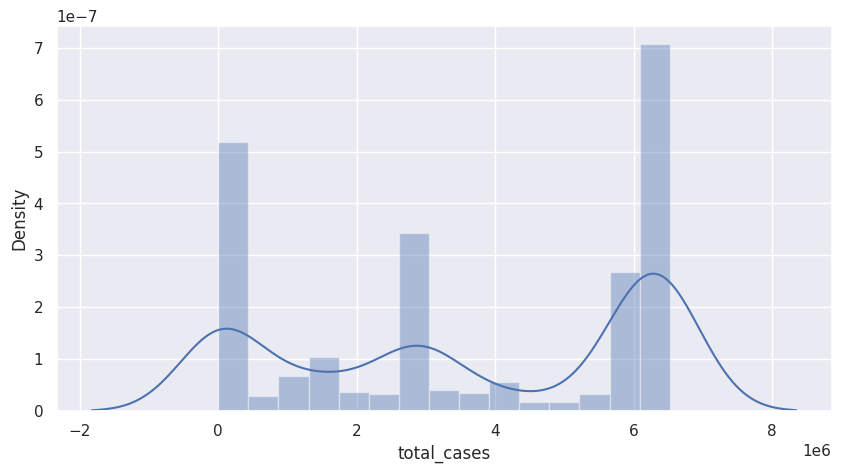

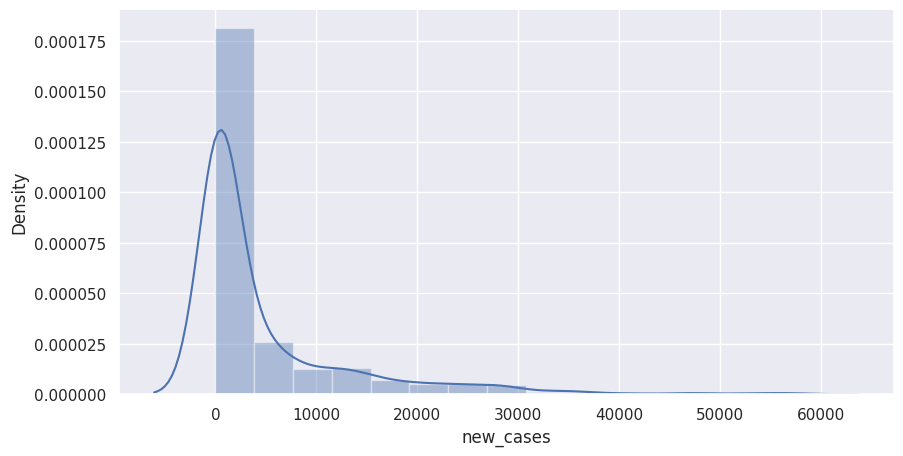

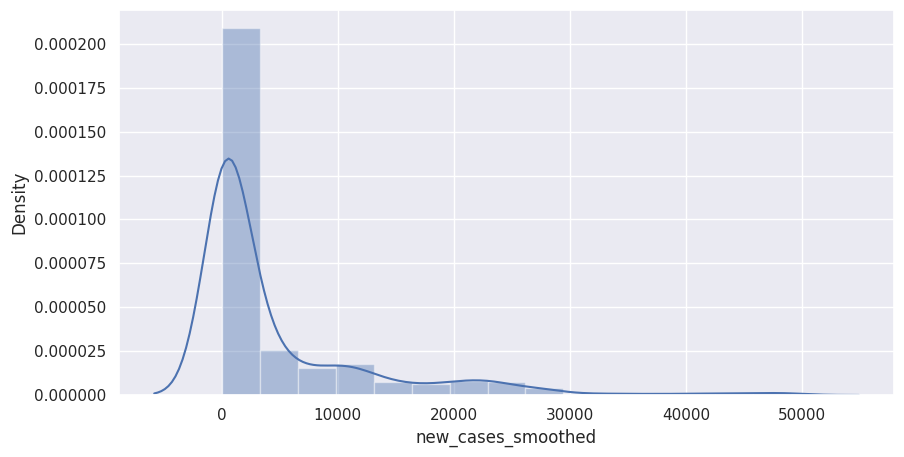

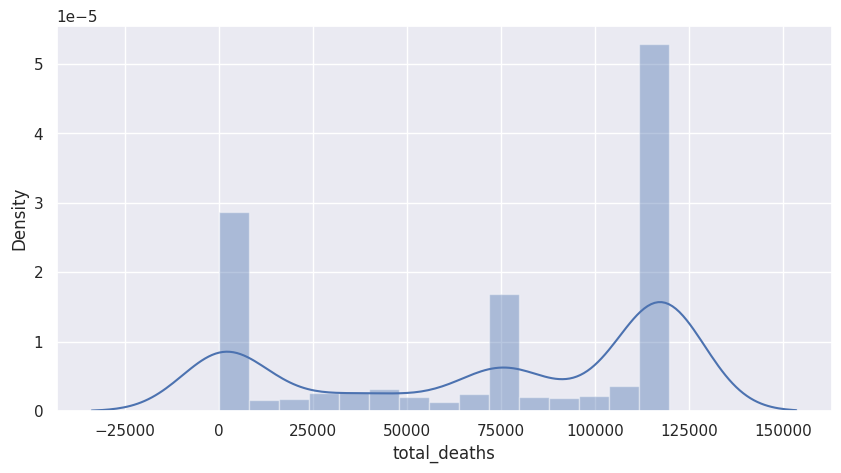

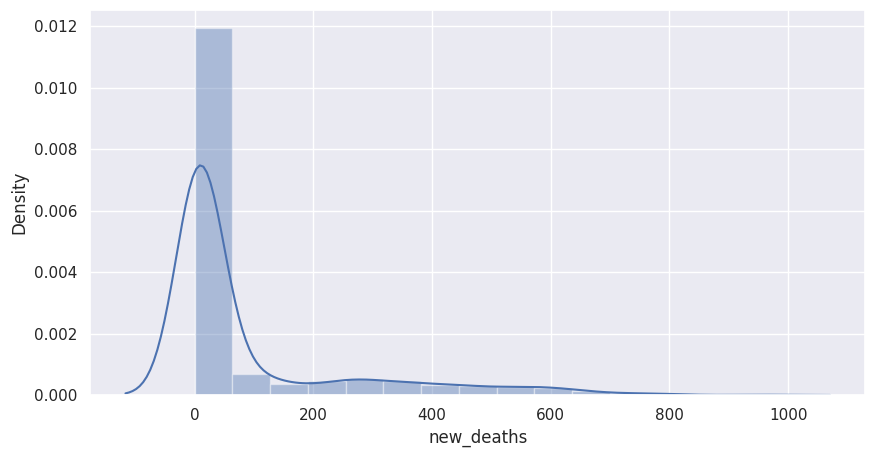

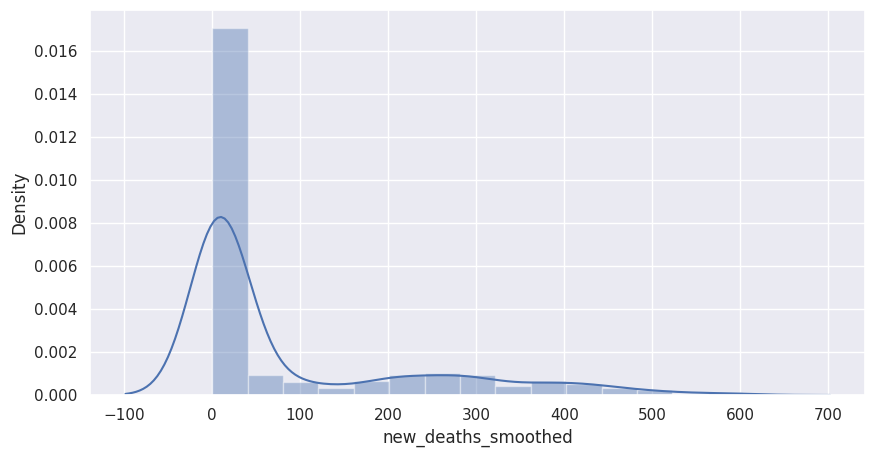

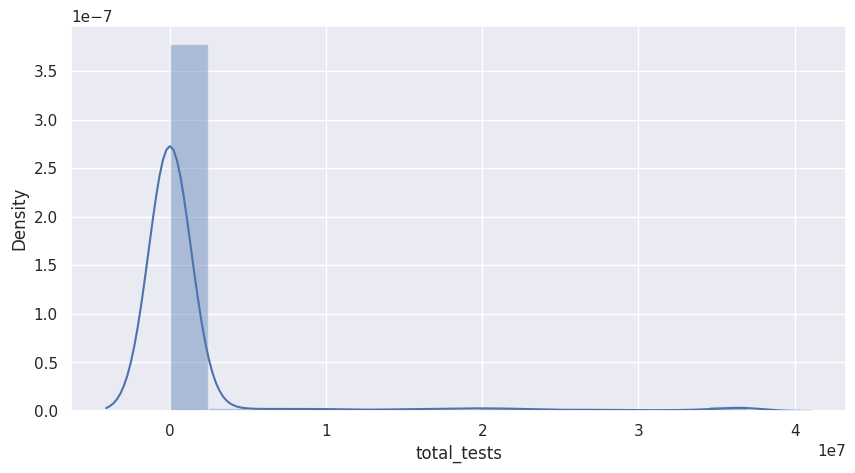

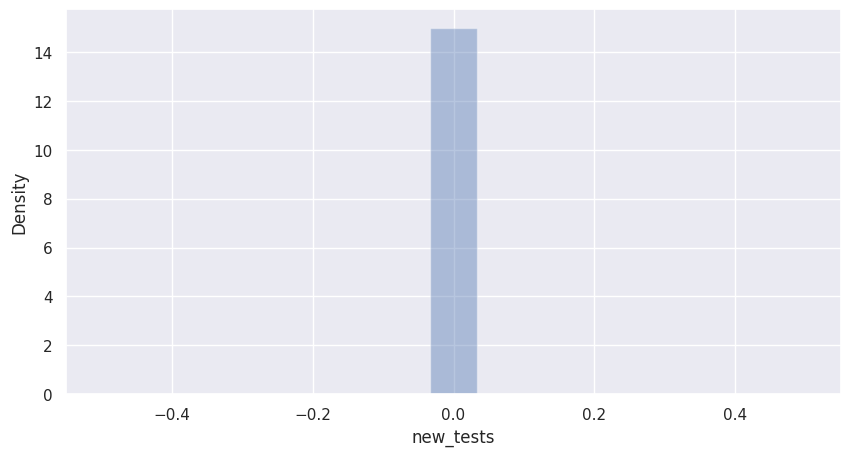

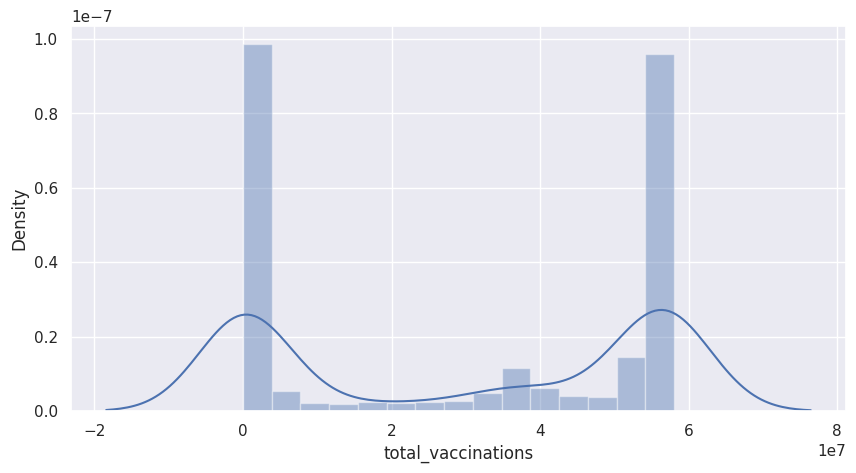

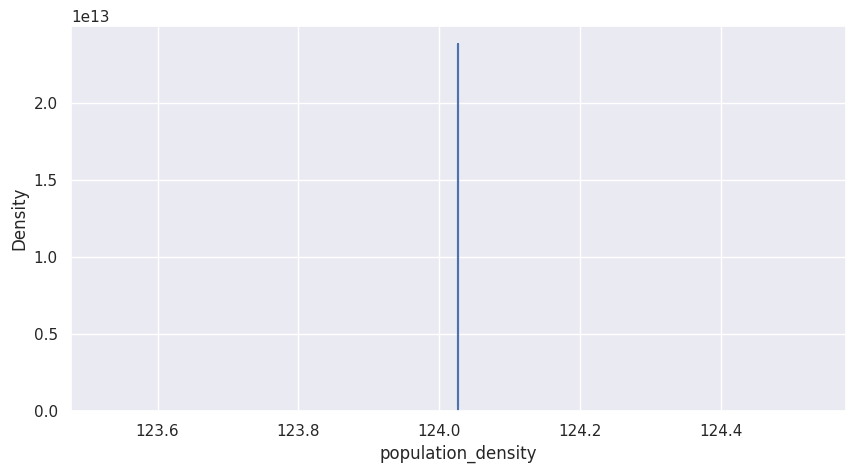

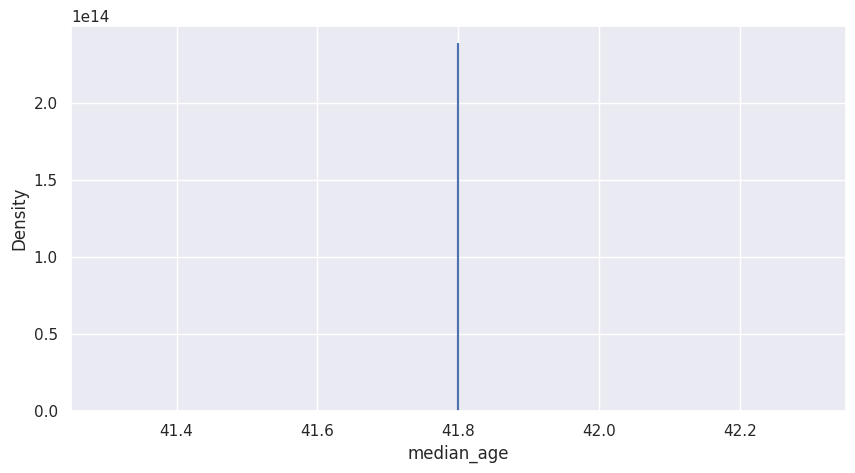

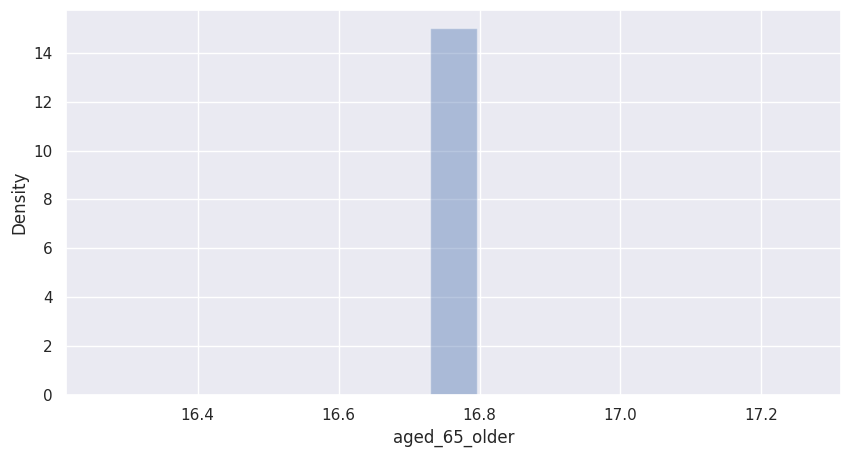

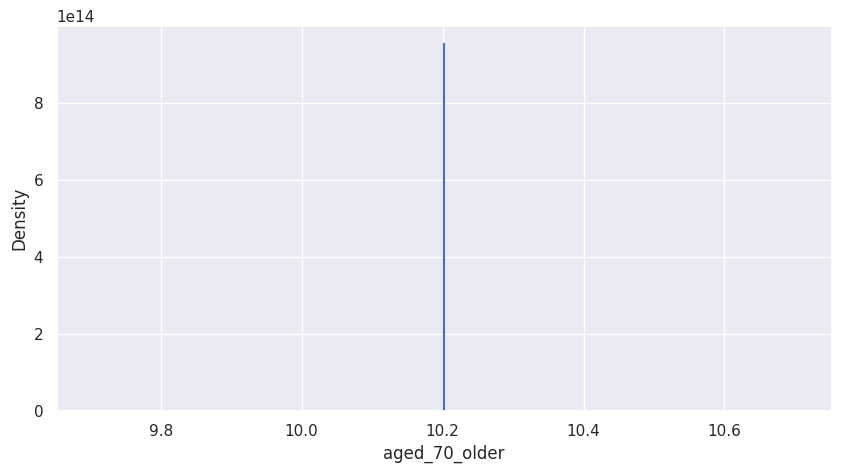

In [32]:
for i in New_pl_data.columns:
    if i!="date":
        plt.figure(figsize=(10,5))
        sns.distplot(New_pl_data[i],bins=15)
        plt.show()

> * **relationship between data , cases and deaths**

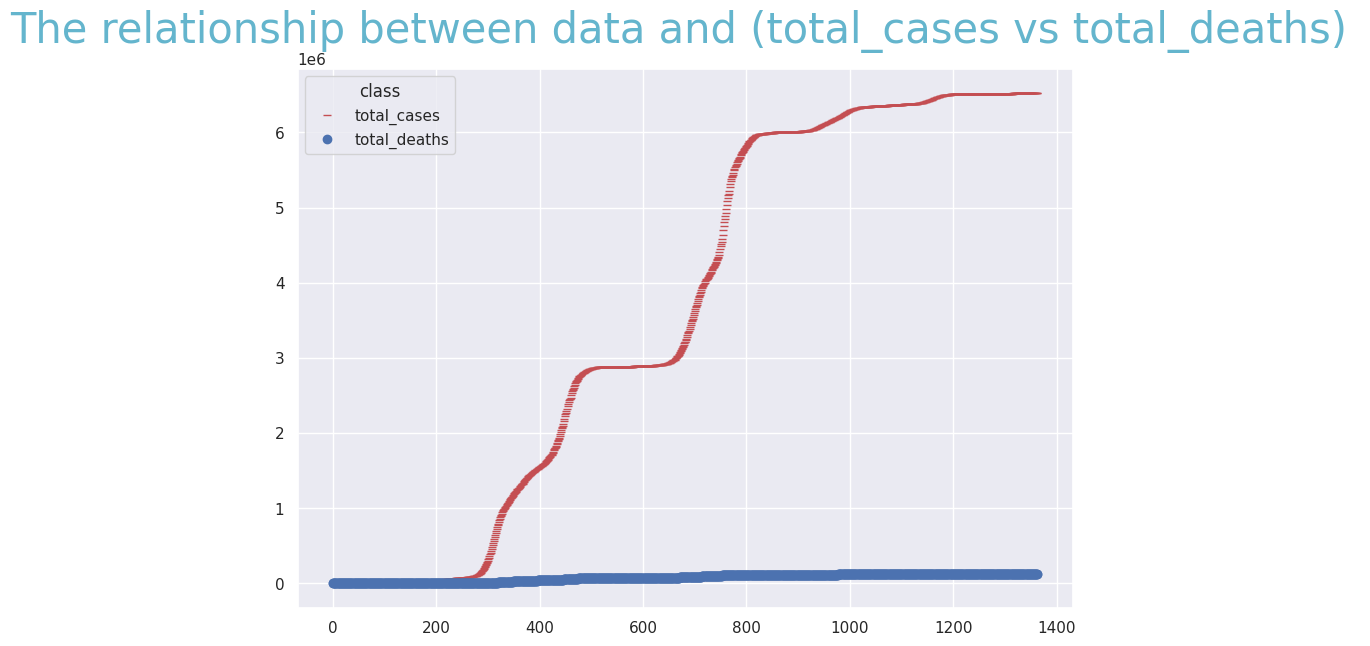

In [33]:
plt.figure(figsize=(10,7))
plt.plot(New_pl_data.index,New_pl_data['total_cases'],'_r',label="total_cases")
plt.plot(New_pl_data.index,New_pl_data['total_deaths'],'ob',label="total_deaths")
plt.title("The relationship between data and (total_cases vs total_deaths) " ,fontsize=30,color='c')
plt.legend(title="class")
plt.show()

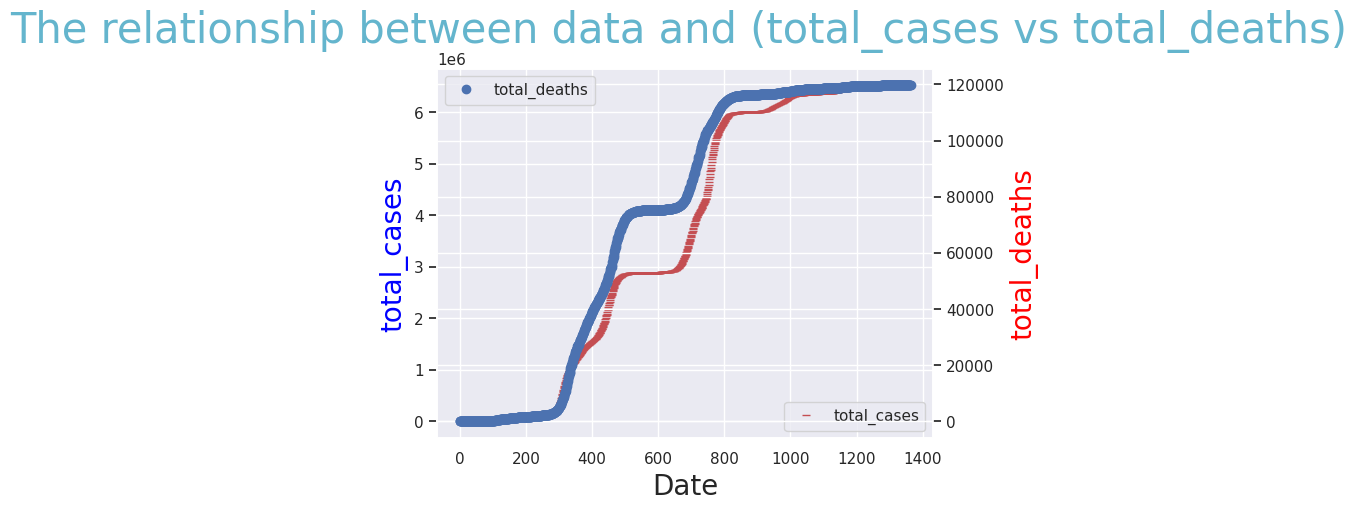

In [34]:
fig ,ax=plt.subplots()
plt.title("The relationship between data and (total_cases vs total_deaths) " ,fontsize=30,color='c')
ax.plot(New_pl_data.index,New_pl_data['total_cases'],'_r',label="total_cases")
ax2=ax.twinx()
ax2.plot(New_pl_data.index,New_pl_data['total_deaths'],'ob',label="total_deaths")
plt.legend()
ax.legend(loc="lower right")
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('total_cases', color='blue', fontsize=20)
ax2.set_ylabel('total_deaths', color='red', fontsize=20)
plt.show()

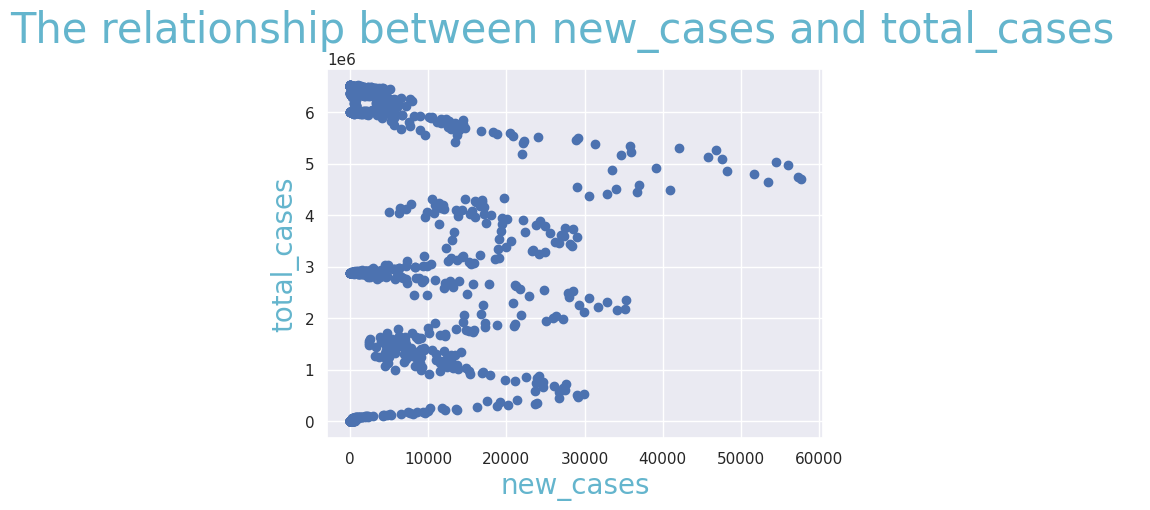

In [35]:
plt.scatter(New_pl_data["new_cases"],New_pl_data['total_cases'])
plt.title("The relationship between new_cases and total_cases  " ,fontsize=30,color='c')
plt.xlabel("new_cases",fontsize=20,color='c')
plt.ylabel("total_cases",fontsize=20,color='c')
plt.show()

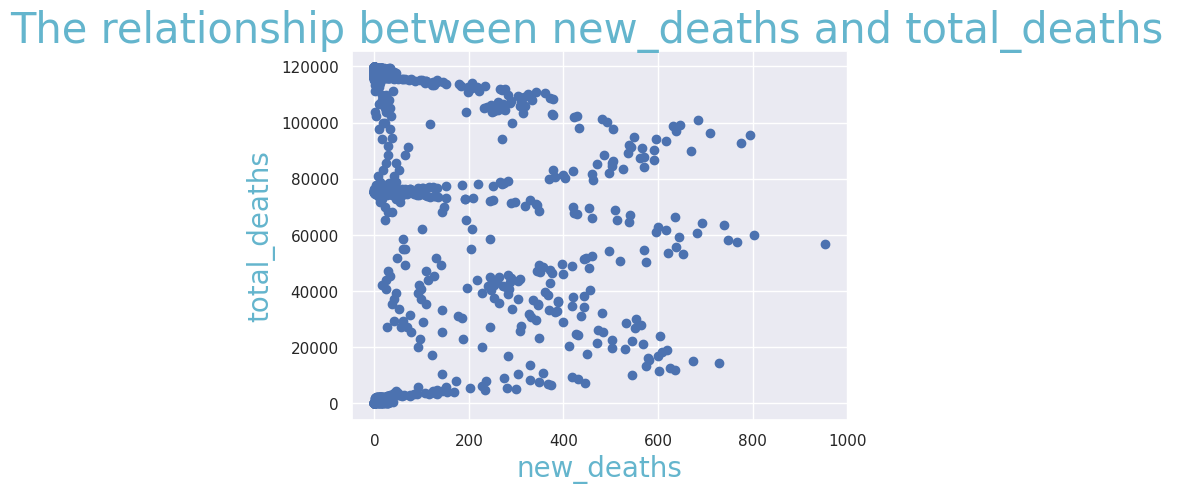

In [36]:
plt.scatter(New_pl_data["new_deaths"],New_pl_data['total_deaths'])
plt.title("The relationship between new_deaths and total_deaths  " ,fontsize=30,color='c')
plt.xlabel("new_deaths",fontsize=20,color='c')
plt.ylabel("total_deaths",fontsize=20,color='c')
plt.show()

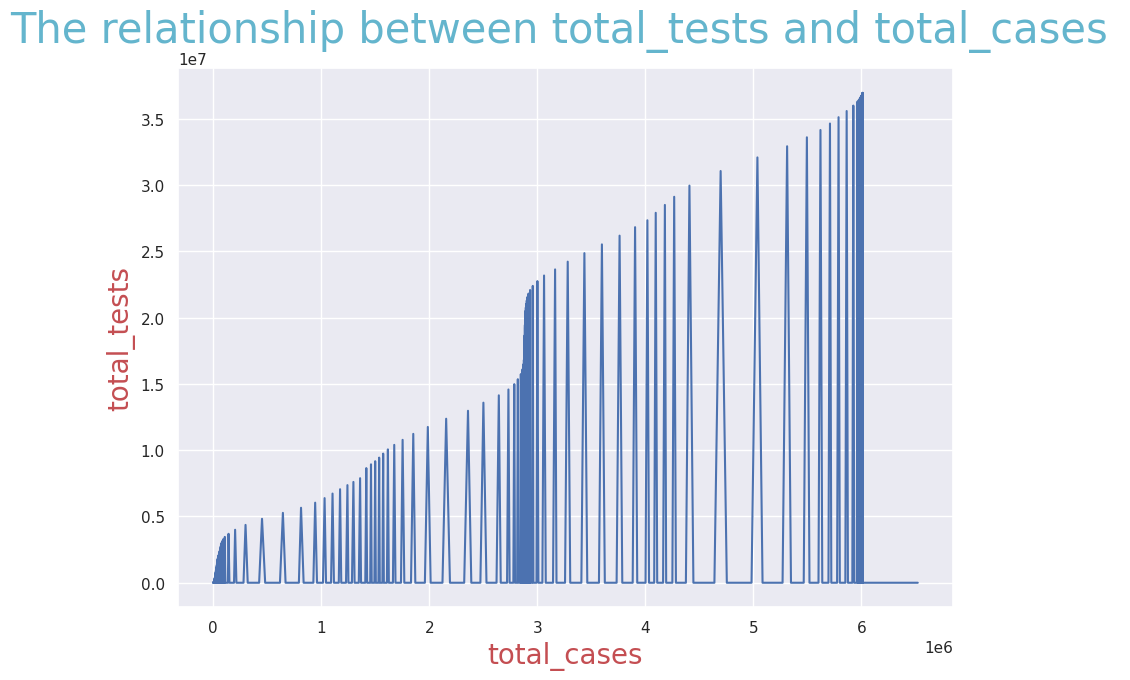

In [37]:
plt.figure(figsize=(10,7))
plt.plot(New_pl_data['total_cases'],New_pl_data["total_tests"],label="total_cases")
plt.title("The relationship between total_tests and total_cases " ,fontsize=30,color='c')
plt.xlabel("total_cases",fontsize=20,color='r')
plt.ylabel("total_tests",fontsize=20,color='r')
plt.show()

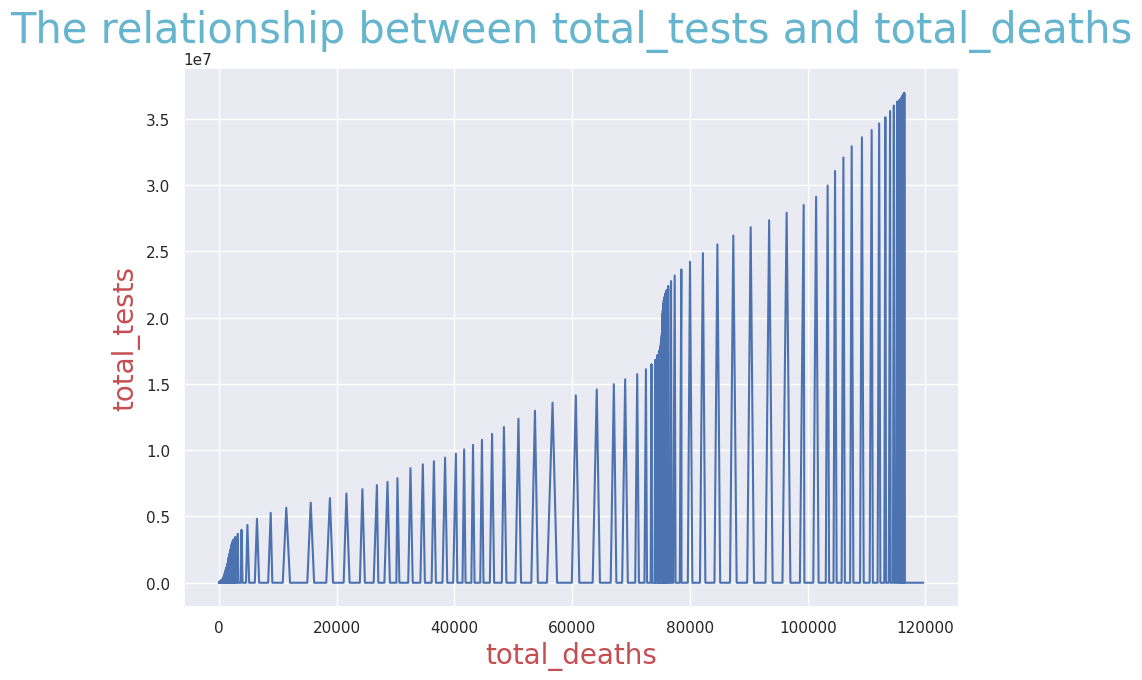

In [38]:
plt.figure(figsize=(10,7))
plt.plot(New_pl_data['total_deaths'],New_pl_data["total_tests"],label="total_deaths")
plt.title("The relationship between total_tests and total_deaths" ,fontsize=30,color='c')
plt.xlabel("total_deaths",fontsize=20,color='r')
plt.ylabel("total_tests",fontsize=20,color='r')
plt.show()

* > **pie chat between every totol**

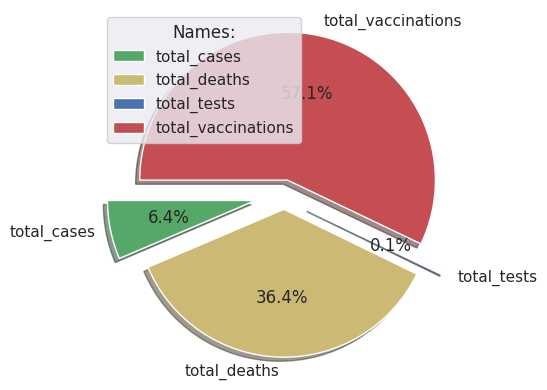

In [39]:
g=[New_pl_data['total_cases'].max(),New_pl_data['total_tests'].max(),New_pl_data['total_deaths'].max(),New_pl_data['total_vaccinations'].max()]
mylabels = ["total_cases", "total_deaths", "total_tests", "total_vaccinations"]
myexplode = [0.2, 0.1 , 0.2, 0.1]
mycolors = ["g", "y", "b", "r"]

plt.pie(g, labels = mylabels, explode = myexplode ,colors = mycolors, startangle = 180 , autopct= '%1.1f%%' ,shadow = True)
plt.legend(title = "Names:",loc='upper left')
plt.show() 

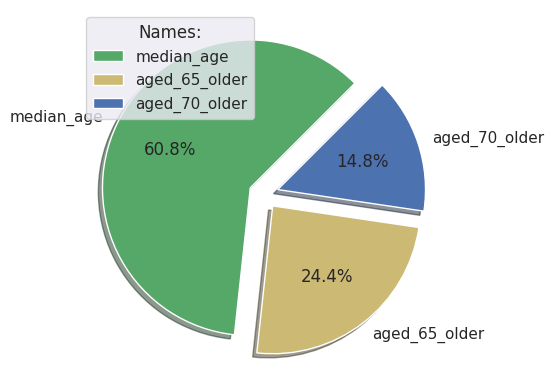

In [40]:
g=[New_pl_data['median_age'].max(),New_pl_data['aged_65_older'].max(),New_pl_data['aged_70_older'].max()]
mylabels = ["median_age", "aged_65_older", "aged_70_older"]
myexplode = [0.1, 0.1 , 0.1]
mycolors = ["g", "y", "b"]

plt.pie(g, labels = mylabels, explode = myexplode ,colors = mycolors, startangle = 45 , autopct= '%1.1f%%' ,shadow = True)
plt.legend(title = "Names:",loc='upper left')
plt.show() 

In [41]:
N_pl_data=New_pl_data.drop(["date","new_tests","median_age","aged_65_older","aged_70_older","population_density"],axis=1)
N_pl_data

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_tests,total_vaccinations
0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...
1359,6520928.0,0.0,140.0,119644.0,0.0,0.286,0.0,58027025.0
1360,6520928.0,0.0,140.0,119644.0,0.0,0.286,0.0,58027029.0
1361,6520928.0,0.0,140.0,119644.0,0.0,0.286,0.0,58027121.0
1362,6520928.0,0.0,0.0,119644.0,0.0,0.000,0.0,58027195.0


In [42]:
h=N_pl_data.corr()
h

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_tests,total_vaccinations
total_cases,1.000000,-0.079261,-0.069923,0.985376,-0.195823,-0.221458,0.031677,0.898653
new_cases,-0.079261,1.000000,0.953517,-0.031415,0.688696,0.679628,0.177573,-0.099632
new_cases_smoothed,-0.069923,0.953517,1.000000,-0.023229,0.639576,0.732656,0.126625,-0.095895
total_deaths,0.985376,-0.031415,-0.023229,1.000000,-0.148251,-0.163788,0.065999,0.888896
new_deaths,-0.195823,0.688696,0.639576,-0.148251,1.000000,0.842548,0.186128,-0.260679
new_deaths_smoothed,-0.221458,0.679628,0.732656,-0.163788,0.842548,1.000000,0.104226,-0.296107
total_tests,0.031677,0.177573,0.126625,0.065999,0.186128,0.104226,1.000000,0.034115
total_vaccinations,0.898653,-0.099632,-0.095895,0.888896,-0.260679,-0.296107,0.034115,1.000000


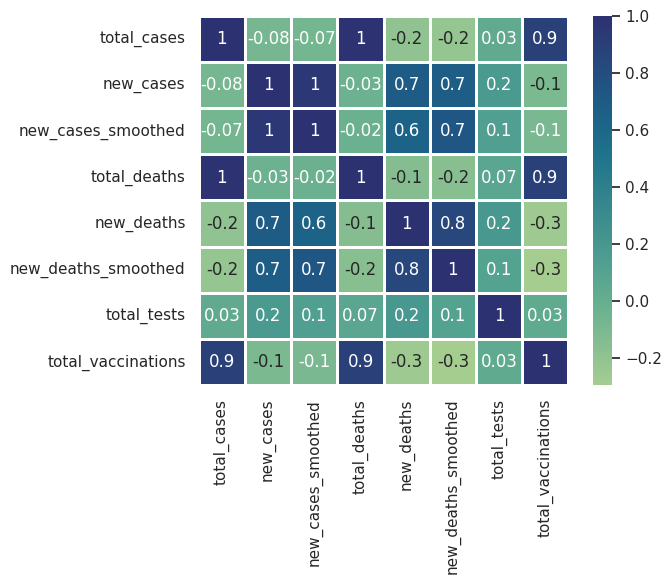

In [43]:
sns.heatmap(h,cmap='crest',square=True,annot=True,fmt='.01g',linewidths=1)
plt.show()